In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data= pd.read_csv(r"D:\Class\Data Science Project\emails.csv")

In [3]:
df= data.copy()

In [4]:
df.head()

,Text,Spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [5]:
df.columns

Index(['Text', 'Spam'], dtype='object')

In [6]:
df.shape

(5728, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    5728 non-null   object
 1   Spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [8]:
df.describe()

,Spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [9]:
df.isnull().sum()

Text    0
Spam    0
dtype: int64

In [10]:
df.duplicated().sum()

33

In [11]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(5695, 2)

In [13]:
df['Spam'].value_counts()

Spam
0    4327
1    1368
Name: count, dtype: int64

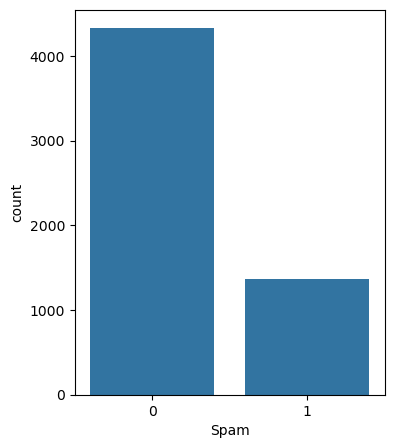

In [14]:
plt.figure(figsize= (4, 5))
sns.countplot(x='Spam', data=df)
plt.show()

<h2> Text Processing </h2>

In [16]:
import nltk

<h3> Tokenization </h3>

In [18]:
from nltk import word_tokenize

def count_words(text):
    # Tokenize the input text into words using the word_tokenize function from NLTK.
    # This function splits the text into individual words and punctuation.
    words = word_tokenize(text)
    return len(words)

In [19]:
df['Count']=df['Text'].apply(count_words)
df.head()

,Text,Spam,Count
0,Subject: naturally irresistible your corporate...,1,325
1,Subject: the stock trading gunslinger fanny i...,1,90
2,Subject: unbelievable new homes made easy im ...,1,88
3,Subject: 4 color printing special request add...,1,99
4,"Subject: do not have money , get software cds ...",1,53


In [20]:
df['Count']

0       325
1        90
2        88
3        99
4        53
       ... 
5723    298
5724    245
5725    516
5726    277
5727    445
Name: Count, Length: 5695, dtype: int64

In [21]:
df.groupby('Spam')['Count'].mean()

Spam
0    347.281488
1    267.896199
Name: Count, dtype: float64

<h3> Removing Punctuations and Stopwords </h3>

In [23]:
import string
from nltk.corpus import stopwords

In [24]:
def process_text(text):
    # Remove punctuation from the input text.
    # The list comprehension iterates over each character in the text and includes it in the list if it is not punctuation.
    no_punc = [char for char in text if char not in string.punctuation]
    
    # Join the characters back into a string after removing punctuation.
    no_punc = ''.join(no_punc)
    
    # Split the text into words and remove stopwords.
    # Stopwords are common words in English (e.g., 'and', 'the', 'is') that are often removed in text preprocessing.
    # This line converts the text to lowercase and excludes words found in the NLTK stopwords list.
    return ' '.join([word for word in no_punc.split() if word.lower() not in stopwords.words('english')])

In [25]:
df['Text']=df['Text'].apply(process_text)
df['Text']

0       Subject naturally irresistible corporate ident...
1       Subject stock trading gunslinger fanny merrill...
2       Subject unbelievable new homes made easy im wa...
3       Subject 4 color printing special request addit...
4       Subject money get software cds software compat...
                              ...                        
5723    Subject research development charges gpg forwa...
5724    Subject receipts visit jim thanks invitation v...
5725    Subject enron case study update wow day super ...
5726    Subject interest david please call shirley cre...
5727    Subject news aurora 5 2 update aurora version ...
Name: Text, Length: 5695, dtype: object

<h3> Stemming </h3>

In [27]:
from nltk.stem import PorterStemmer

# Create an instance of the PorterStemmer
stemmer = PorterStemmer()

def stemming(text):
    # Split the input text into words, apply stemming to each word,
    # and then rejoin the stemmed words into a single string.
    return ' '.join([stemmer.stem(word) for word in text.split()])

In [28]:
df['Text']=df['Text'].apply(stemming)
df.head()

,Text,Spam,Count
0,subject natur irresist corpor ident lt realli ...,1,325
1,subject stock trade gunsling fanni merril muzo...,1,90
2,subject unbeliev new home made easi im want sh...,1,88
3,subject 4 color print special request addit in...,1,99
4,subject money get softwar cd softwar compat gr...,1,53


<h3> Bag of Words Model 
</h3>

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

# Create an instance of CountVectorizer
# This vectorizer will convert a collection of text documents into a matrix of token counts.
vectorizer = CountVectorizer()

# Fit the model to the 'Text' column of the DataFrame 'df' and transform the text data into a sparse matrix.
# Each row corresponds to a document (in this case, a text entry in the 'Text' column),
# and each column corresponds to a token (word) in the vocabulary identified by the vectorizer.
message_bow = vectorizer.fit_transform(df['Text'])

In [31]:
#vectorizer.get_feature_names()
message_bow.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [4, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

<h2> Building a Model </h2>

In [33]:
x= message_bow
y= df['Spam']

In [34]:
# Train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [35]:
x_train.shape, x_test.shape

((4556, 29254), (1139, 29254))

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [37]:
def train_model(x_train, x_test, y_train, y_test):
    classifier = {
        "Logistic Regression": LogisticRegression(),
        "Decision Tree Classifier": DecisionTreeClassifier(),
        "Random Forest Classifier": RandomForestClassifier(random_state=101),
        "SVM Classifier": SVC(probability=True),
        "Naive Bayes Multinomial Classifier": MultinomialNB()
    }

    for name, model in classifier.items():
        print(f"\n================ {name} ================\n")
        model.fit(x_train, y_train)
        
        # Make predictions
        y_pred_train = model.predict(x_train)
        y_pred_test = model.predict(x_test)
        
        # Confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred_test)
        print(f"Confusion Matrix:\n{conf_matrix}")

        # Accuracy
        print(f"\nAccuracy of Training Data: {accuracy_score(y_train, y_pred_train)}")
        print(f"\nAccuracy of Testing Data: {accuracy_score(y_test, y_pred_test)}")
        
        # Classification report
        clf_report = classification_report(y_test, y_pred_test)
        print(f"\nClassification Report:\n{clf_report}")

        # ROC-AUC Score
        roc_auc = roc_auc_score(y_test, y_pred_test)
        print(f"ROC-AUC Score: {roc_auc}")
    
        # Plot ROC Curve
        fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:, 1])
        plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve \n using {name}', fontsize=10)
        plt.legend(loc='best')
        plt.show()
        print("\n")


================ Logistic Regression ================

Confusion Matrix:
[[867   4]
 [  4 264]]

Accuracy of Training Data: 1.0

Accuracy of Testing Data: 0.9929762949956101

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       871
           1       0.99      0.99      0.99       268

    accuracy                           0.99      1139
   macro avg       0.99      0.99      0.99      1139
weighted avg       0.99      0.99      0.99      1139

ROC-AUC Score: 0.9902411021814007


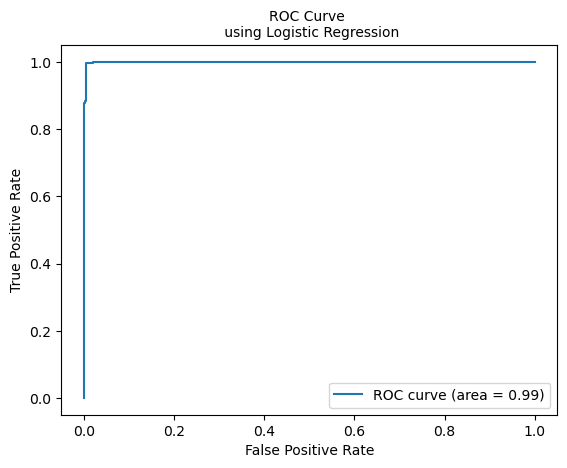




================ Decision Tree Classifier ================

Confusion Matrix:
[[843  28]
 [ 21 247]]

Accuracy of Training Data: 1.0

Accuracy of Testing Data: 0.9569798068481123

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       871
           1       0.90      0.92      0.91       268

    accuracy                           0.96      1139
   macro avg       0.94      0.94      0.94      1139
weighted avg       0.96      0.96      0.96      1139

ROC-AUC Score: 0.944747416762342


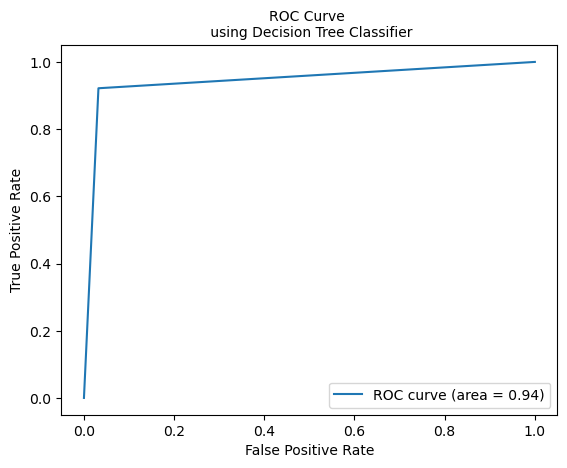




================ Random Forest Classifier ================

Confusion Matrix:
[[868   3]
 [ 20 248]]

Accuracy of Training Data: 1.0

Accuracy of Testing Data: 0.9798068481123793

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       871
           1       0.99      0.93      0.96       268

    accuracy                           0.98      1139
   macro avg       0.98      0.96      0.97      1139
weighted avg       0.98      0.98      0.98      1139

ROC-AUC Score: 0.9609644087256027


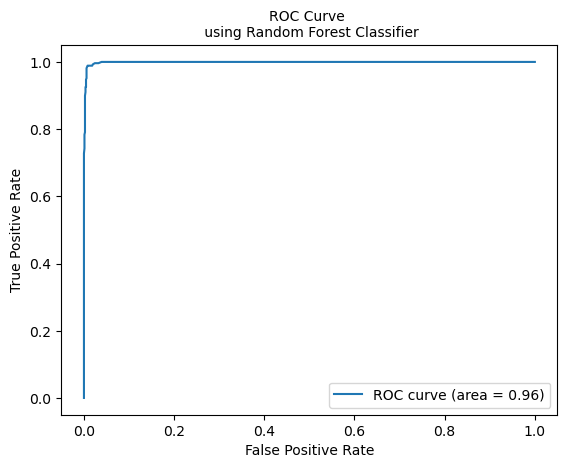




================ SVM Classifier ================

Confusion Matrix:
[[866   5]
 [ 20 248]]

Accuracy of Training Data: 0.9920983318700615

Accuracy of Testing Data: 0.9780509218612818

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       871
           1       0.98      0.93      0.95       268

    accuracy                           0.98      1139
   macro avg       0.98      0.96      0.97      1139
weighted avg       0.98      0.98      0.98      1139

ROC-AUC Score: 0.9598163030998852


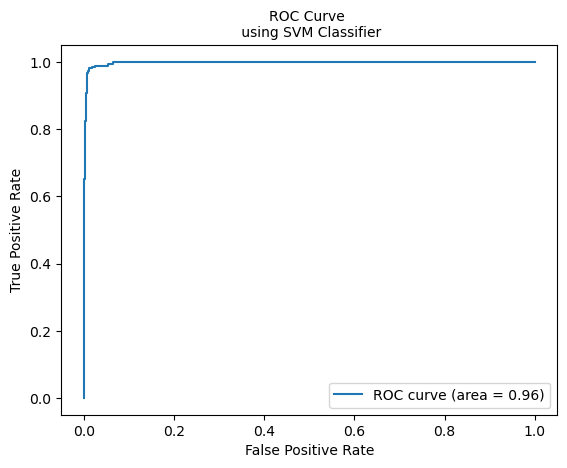




================ Naive Bayes Multinomial Classifier ================

Confusion Matrix:
[[860  11]
 [  2 266]]

Accuracy of Training Data: 0.9958296751536435

Accuracy of Testing Data: 0.9885864793678666

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       871
           1       0.96      0.99      0.98       268

    accuracy                           0.99      1139
   macro avg       0.98      0.99      0.98      1139
weighted avg       0.99      0.99      0.99      1139

ROC-AUC Score: 0.9899540757749713


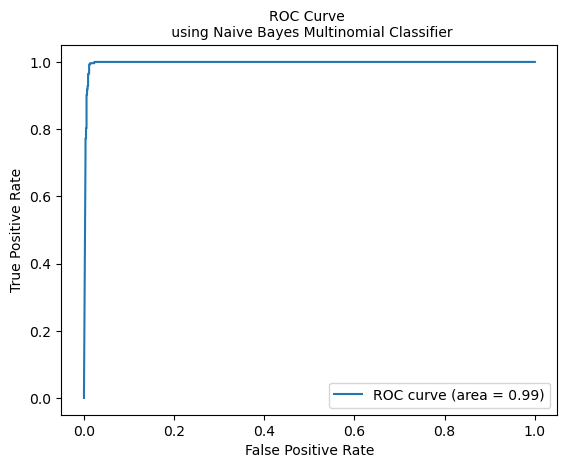

In [38]:
# Call the train_model function
train_model(x_train, x_test, y_train, y_test)

<h4> Best Model Based on Needs: </h4>
If minimizing false positives (ham being classified as spam) is the priority, then Logistic Regression is the best, as both have very high precision for spam. <br>
If minimizing false negatives (spam being classified as ham) is the priority, then Naive Bayes is the best model because of its perfect recall for spam.

<h4> Conclusion: </h4>

Logistic Regression strikes the best balance between precision and recall, making it a great overall choice. <br>
Naive Bayes is the best option if missing spam is a bigger concern.